In [1]:
#Question A1
import numpy as np
from sklearn.cluster import KMeans

# Load feature and label arrays
activation_maps = np.load('activation_maps_lines_image_chunk_3_MaI14_012_pixel.npy')
label_maps = np.load('activation_maps_lines_thresholded_mask_chunk_3_MaI14_012_pixel.npy')

# Printing the dimensions of the arrays
print("Dimensions of activation maps:", activation_maps.shape)
print("Dimensions of label maps:", label_maps.shape)

# Reshaping label maps if they are in 3D format
if label_maps.ndim == 3:
    # Reshape to 2D by combining the first two dimensions
    label_maps = label_maps.reshape(-1, label_maps.shape[2])

# Merging features and labels
full_dataset = np.concatenate((activation_maps, label_maps), axis=1)

# Separating out the features from the class labels
features_for_clustering = full_dataset[:, :-1]

# Initialize and apply KMeans clustering
cluster_count = 3  # Number of clusters
kmeans_cluster = KMeans(n_clusters=cluster_count, random_state=0).fit(features_for_clustering)

# Get the resulting cluster assignments
clusters = kmeans_cluster.labels_


Dimensions of activation maps: (262144, 18)
Dimensions of label maps: (262144, 1)


In [ ]:
# Question A2
import matplotlib.pyplot as plt

# Define the range for k (number of clusters)
cluster_range = range(1, 32)  # k values from 1 to 31

# List for holding the inertia (sum of squared distances) for each k
squared_distance_sum = []

for k in cluster_range:
    cluster_model = KMeans(n_clusters=k, random_state=0).fit(features_for_clustering)
    squared_distance_sum.append(cluster_model.inertia_)

# Plotting the results using the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, squared_distance_sum, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Inertia (Sum of Squared Distances to Centers)')
plt.title('Elbow Plot for Optimal Cluster Number')
plt.show()


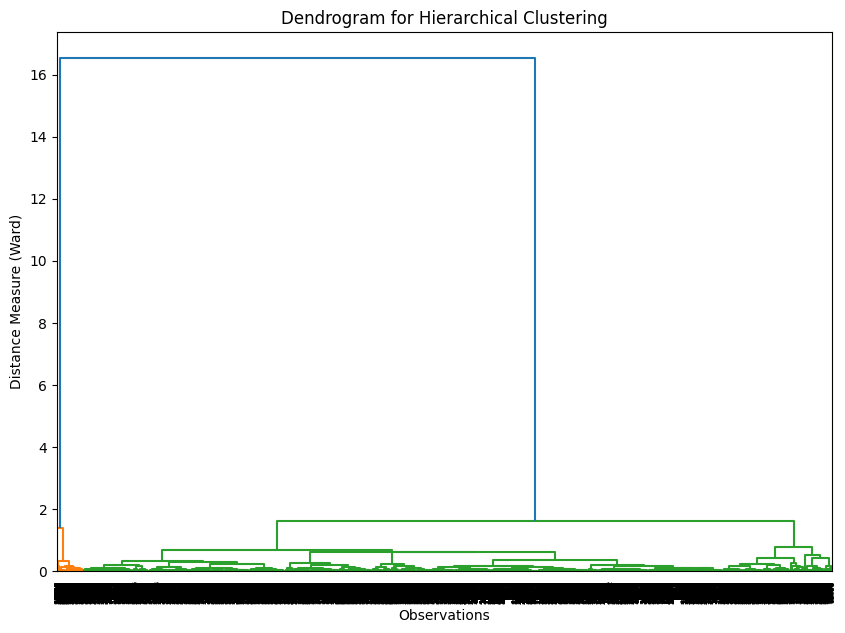

In [5]:
# Question A3
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Assuming features_for_clustering is prepared as in A1
# Load feature and label arrays
activation_maps = np.load('/content/activation_maps_lines_image52_pixel (1).npy')
label_maps = np.load('/content/activation_maps_lines_image52_labelpixel.npy')

# Reshaping and merging data
if label_maps.ndim == 3:
    label_maps = label_maps.reshape(-1, label_maps.shape[2])
full_dataset = np.concatenate((activation_maps, label_maps), axis=1)
features_for_clustering = full_dataset[:, :-1]

# Applying Agglomerative Clustering for hierarchical analysis
agg_clustering = AgglomerativeClustering().fit(features_for_clustering)

# Creating and displaying the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram_plot = sch.dendrogram(sch.linkage(features_for_clustering, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Observations')
plt.ylabel('Distance Measure (Ward)')
plt.show()



In [7]:
# Question A4
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split

# Using 'features_for_clustering' and 'label_maps' from A1

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_for_clustering, label_maps, test_size=0.3, random_state=0)

# Initializing the classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

# Sequential Forward Selection (SFS)
sequential_fs = SFS(random_forest,
                    k_features='best',
                    forward=True,
                    floating=False,
                    scoring='accuracy',
                    cv=5)

sequential_fs = sequential_fs.fit(X_train, y_train.ravel())

# Getting the indices of the selected features
optimal_features = list(sequential_fs.k_feature_idx_)
print("Optimal feature indices:", optimal_features)


Optimal feature indices: [3]


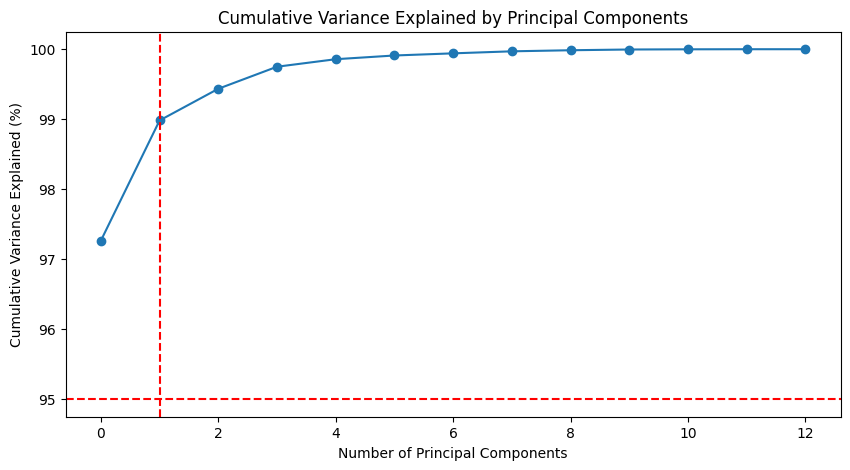

Number of features to capture 95% of data variance: 1


In [8]:
#Question A5
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Using 'features_for_clustering' from A1

# Performing PCA
pca = PCA().fit(features_for_clustering)

# Cumulative sum of variance explained with [n] features
variance_cumulative = np.cumsum(pca.explained_variance_ratio_) * 100

# Determining the number of features needed for 95% variance
number_of_features = np.argmax(variance_cumulative >= 95) + 1  # Adding 1 as index starts from 0

# Plotting the Variance Explained by Principal Components
plt.figure(figsize=(10, 5))
plt.plot(variance_cumulative, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.axhline(y=95, color='red', linestyle='--')
plt.axvline(x=number_of_features, color='red', linestyle='--')
plt.show()

print(f"Number of features to capture 95% of data variance: {number_of_features}")


In [9]:
#Question A6
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Using 'features_for_clustering' and 'label_maps' from A1

# Apply PCA to find the number of features capturing 95% variance
pca = PCA().fit(features_for_clustering)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100
k = np.argmax(cumulative_variance >= 95) + 1  # Adjusting index to start from 1

# Transforming the data using the first K principal components
pca_transformed = PCA(n_components=k)
X_transformed = pca_transformed.fit_transform(features_for_clustering)

# Splitting the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, label_maps, test_size=0.3, random_state=42)

# Training a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train.ravel())

# Predicting and calculating the accuracy
predicted_labels = classifier.predict(X_test)
model_accuracy = accuracy_score(y_test, predicted_labels)

print(f"Model accuracy with {k} principal components: {model_accuracy}")


Model accuracy with 1 principal components: 0.5284784377542717
